In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

Load Datasets

In [2]:
df_1 = pd.read_csv('data/info_1.csv', index_col=0)
train_df = pd.read_csv('data/train_1.csv', header=None)
test_df = pd.read_csv('data/train_1.csv', header=None)

X_train = train_df.iloc[:,:-1]
y_train = train_df.iloc[:,-1]

X_test = test_df.iloc[:,:-1]
y_test = test_df.iloc[:,-1]

Train, Test, Validate

In [3]:
perceptron = sklearn.linear_model.Perceptron().fit(X_train, y_train)
y_pred = perceptron.predict(X_test)

Output Classification

In [4]:
out_pred = np.c_[np.arange(1,len(y_pred) + 1), y_pred]

Confusion Matrix and Plot

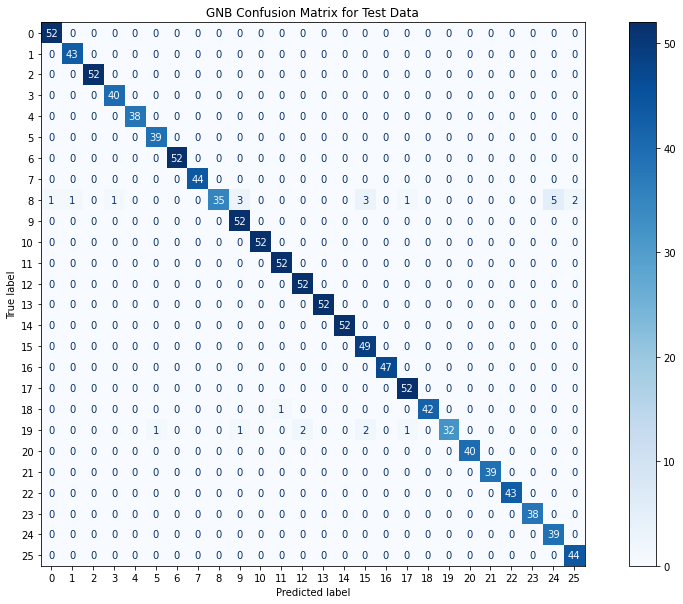

In [5]:
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)

# show confusion matrix plot
fig, ax = plt.subplots(figsize=(16,10))
plot_confusion_matrix(perceptron, X_test, y_test, cmap='Blues', ax=ax)
ax.set_title('GNB Confusion Matrix for Test Data')
plt.show()

Compute Metrics for Each Class

In [6]:
df_1['precision'] = sklearn.metrics.precision_score(y_test, y_pred, average=None, zero_division=0)
df_1['recall'] = sklearn.metrics.recall_score(y_test, y_pred, average=None)
df_1['f1'] = sklearn.metrics.f1_score(y_test, y_pred, average=None)

df_1

,symbol,precision,recall,f1
index,,,,
0,A,0.981132,1.000000,0.990476
1,B,0.977273,1.000000,0.988506
2,C,1.000000,1.000000,1.000000
3,D,0.975610,1.000000,0.987654
4,E,1.000000,1.000000,1.000000
5,F,0.975000,1.000000,0.987342
6,G,1.000000,1.000000,1.000000
7,H,1.000000,1.000000,1.000000
8,I,1.000000,0.673077,0.804598


Accuracy, Macro-Average F1 and Weighted-Average F1 of the Model

In [7]:
scores = [
    sklearn.metrics.accuracy_score(y_test, y_pred),
    sklearn.metrics.f1_score(y_test, y_pred, average='macro'),
    sklearn.metrics.f1_score(y_test, y_pred, average='weighted')
]
model_desc = pd.DataFrame(scores, index=['accuracy', 'macro-average', 'weighted-average'], columns=['DS_1'])
model_desc

,DS_1
accuracy,0.979114
macro-average,0.978189
weighted-average,0.977796
